# Data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("diamonds.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Минимальные значения x, y, z равные 0 сигнализируют о том, что данные в некоторых местах повреждены или просто неп

In [5]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Были убраны 20 записей

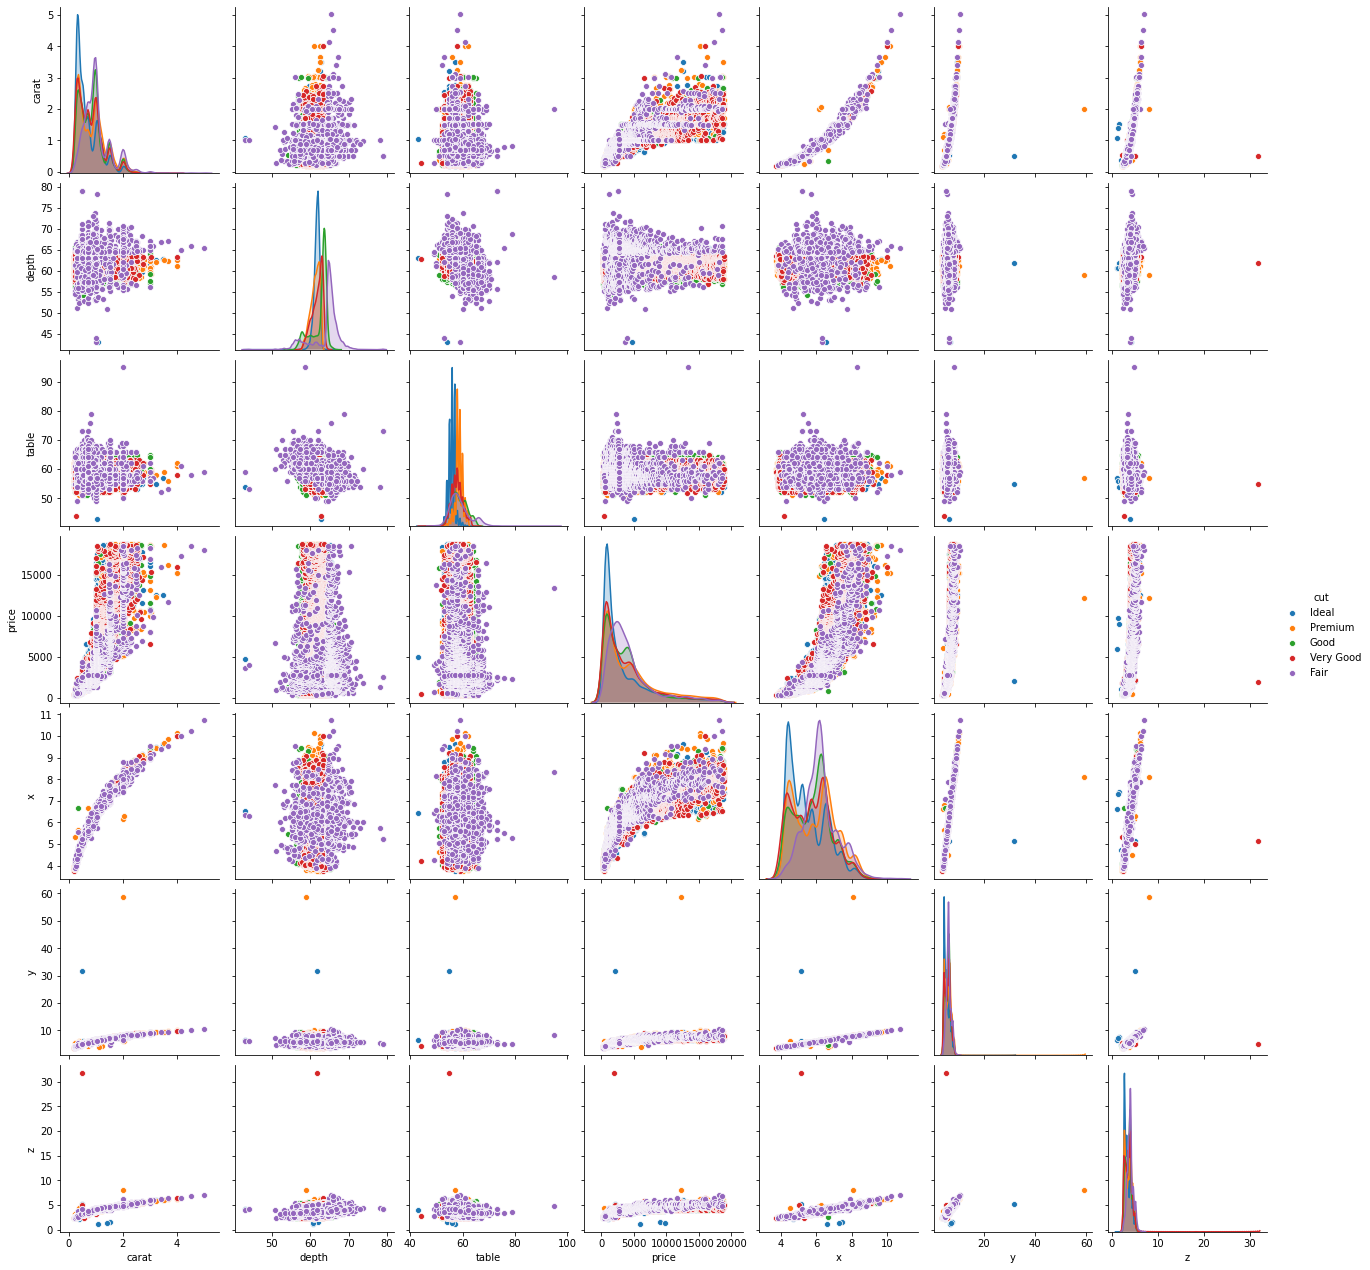

In [6]:
ax = sns.pairplot(df, hue="cut")

Text(0.5, 1.0, "Regression Line on Price vs 'x'")

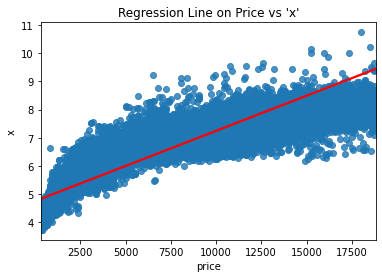

In [7]:
ax = sns.regplot(x="price", y="x", data=df, fit_reg=True, line_kws={"color": "#FF0000"})
ax.set_title("Regression Line on Price vs 'x'")

Из этих данных можно сделать вывод, что есть единичные выбросы по x, y, z. А также большинство значений по "depth" и "table" лежат близки

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

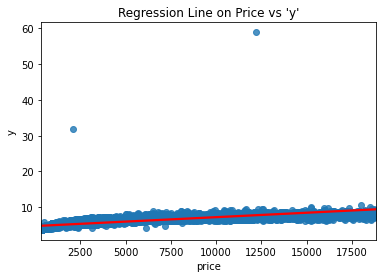

In [8]:
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True, line_kws={"color": "#FF0000"})
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

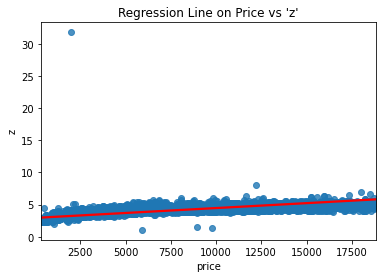

In [9]:
ax = sns.regplot(x="price", y="z", data=df, fit_reg=True, line_kws={"color": "#FF0000"})
ax.set_title("Regression Line on Price vs 'z'")

Text(0.5, 1.0, "Regression Line on Price vs 'depth'")

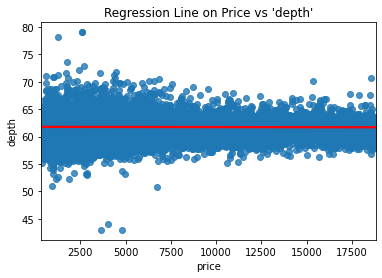

In [10]:
ax = sns.regplot(x="price", y="depth", data=df, fit_reg=True, line_kws={"color": "#FF0000"})
ax.set_title("Regression Line on Price vs 'depth'")

Text(0.5, 1.0, "Regression Line on Price vs 'talbe'")

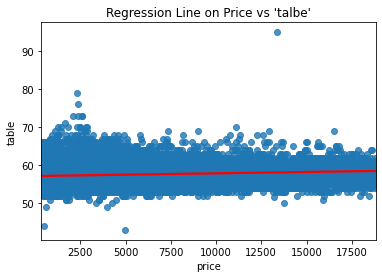

In [11]:
ax = sns.regplot(x="price", y="table", data=df, fit_reg=True, line_kws={"color": "#FF0000"})
ax.set_title("Regression Line on Price vs 'talbe'")

Теперь отфильтруем наши данные:

In [12]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>50)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53901, 10)

Убрано ещё 19 значений

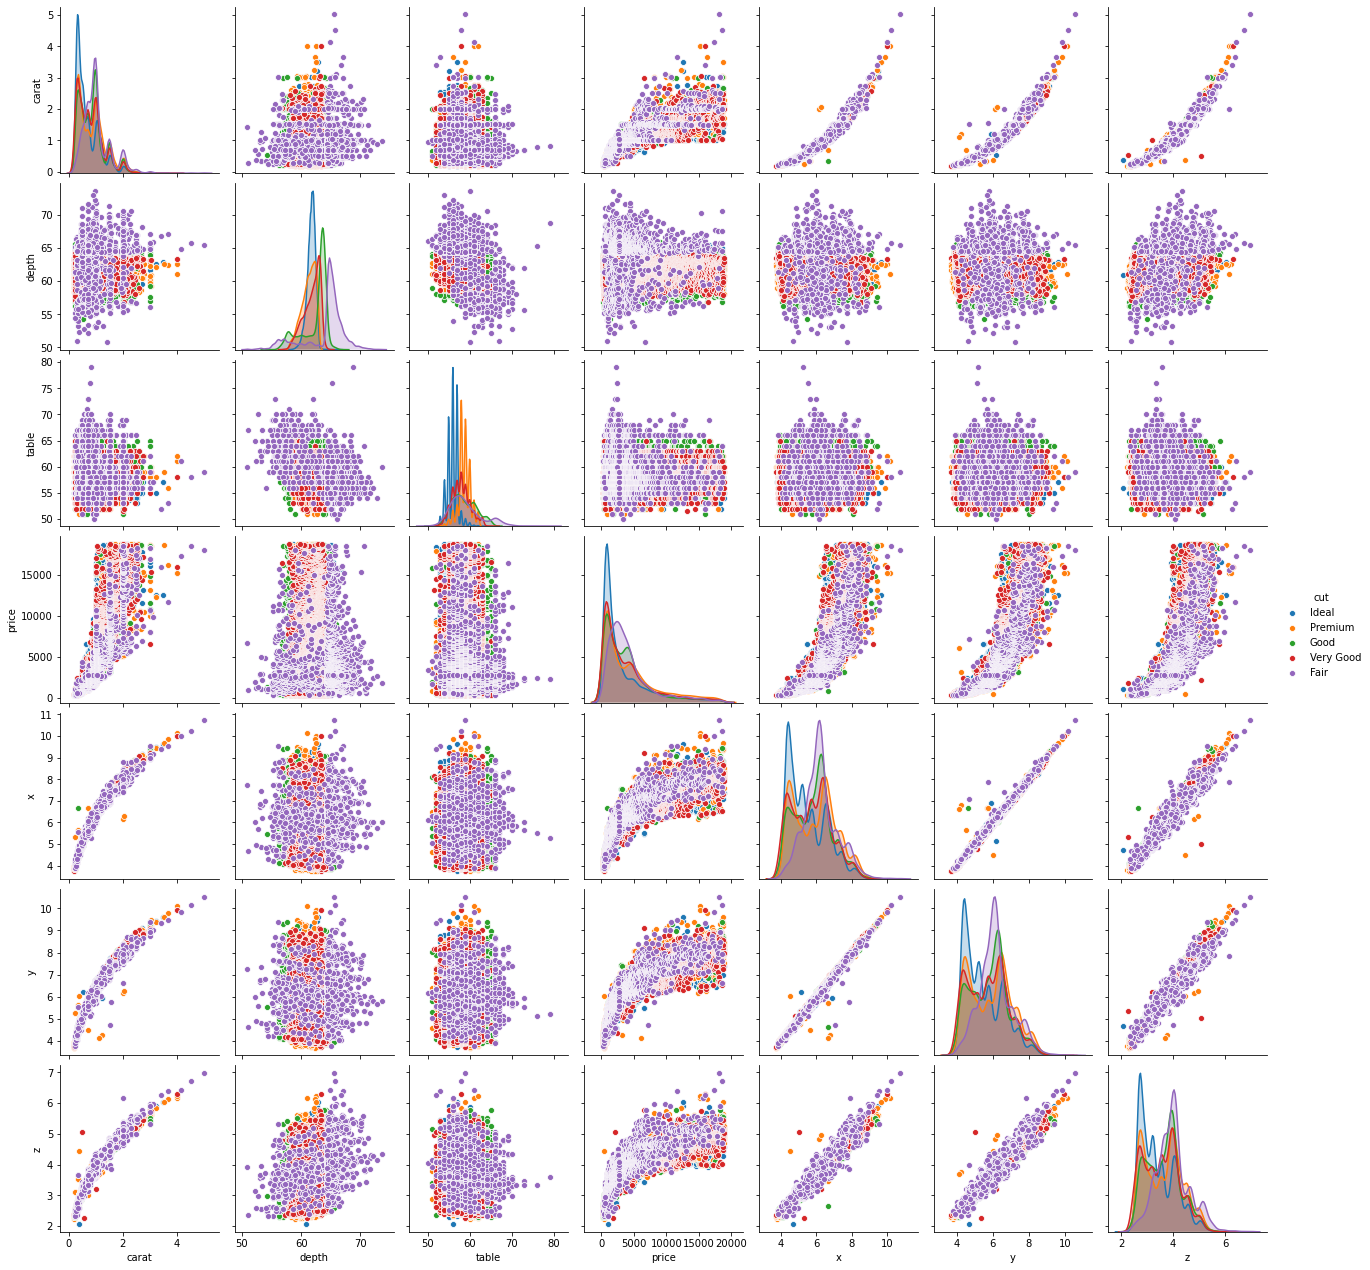

In [13]:
ax=sns.pairplot(df, hue= "cut")


Заменим нечисловые данные числовыми:

In [14]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
objects = ['cut', 'color', 'clarity']
for col in objects:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


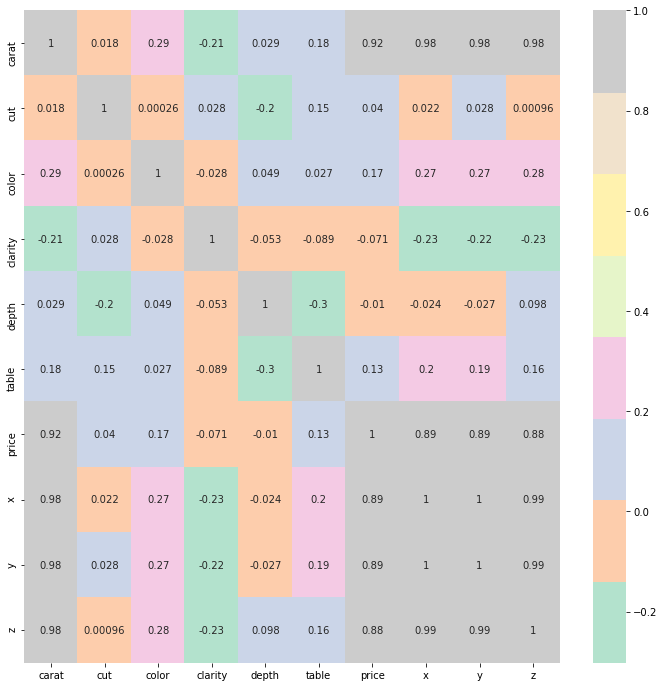

In [15]:
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

Здесь мы видим маленькие коррелляции цены с cut, clarity, depth. Эти параметры можно и выкинуть

In [16]:
# df = df.drop(["cur"],axis =1)
# df = df.drop(["clarity"],axis =1)
# df = df.drop(["depth"],axis =1)

# Обучение моделей

In [17]:
from sklearn.model_selection import train_test_split

X= df.drop(["price"],axis =1)
y= df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])
pipeline_rf=Pipeline([("scalar2",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])
pipelines = [pipeline_lr, pipeline_rf]
pipe_dict = {0: "LinearRegression", 1: "RandomForest"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [19]:
from sklearn.model_selection import cross_val_score
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1334.792586 
RandomForest: -550.059948 


In [20]:
from sklearn import metrics
import numpy as np

for i, model in enumerate(pipelines):
    print(pipe_dict[i])
    pred = model.predict(X_test)
    print("R^2:",metrics.r2_score(y_test, pred))
    print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    print("MAE:",metrics.mean_absolute_error(y_test, pred))
    print("MSE:",metrics.mean_squared_error(y_test, pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print()

LinearRegression
R^2: 0.8827575252571319
Adjusted R^2: 0.8826791662587148
MAE: 860.1728575893209
MSE: 1852203.0448913665
RMSE: 1360.9566653245674

RandomForest
R^2: 0.9815396347144519
Adjusted R^2: 0.9815272967308213
MAE: 267.70476231171705
MSE: 291637.86304143164
RMSE: 540.035057233724

